# <span style='color: darkblue'> Importing essential libraries for data manipulation and visualization </span>


In [1]:
#Importing essential libraries for data manipulation and visualization.
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
import numpy as np
import shutil
from git import Repo
import cv2
import plotly.graph_objects as go
from collections import Counter

# <span style='color: darkblue'> Importing the Training and Testing Dataset </span>

In [12]:
!git clone https://github.com/sartajbhuvaji/brain-tumor-classification-dataset.git

Cloning into 'brain-tumor-classification-dataset'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035
Receiving objects: 100% (3039/3039), 79.25 MiB | 4.61 MiB/s, done.


# <span style='color: darkblue'> Preparing the Training Dataset </span>


In [3]:
# Define the source of the directory containing the training images
source_dir_train = "brain-tumor-classification-dataset/Training"

# Define the destination directory for the training dataset with renamed images

destination_dir_train = 'Make_one_Training_dataset'
os.makedirs(destination_dir_train, exist_ok=True)

# Iterate for each subfolder in the that directory

for subdir_train in os.listdir(source_dir_train):
    subdir_path_train = os.path.join(source_dir_train, subdir_train)

    # Check if the current item in the source directory is a subdirectory
    if os.path.isdir(subdir_path_train):
      # Proceed with further processing if it's a directory

      # Iterate through each image file in the subfolder
      for image_train in os.listdir(subdir_path_train):
        # If image ends with .jpg in the subfolder proceed
        if image_train.endswith('.jpg'):

          # Check when you come at the sub folder 'no_tumor'
          # Add prepend the naming of the image with nn
          # Other images in training dataset are distinguished

          if subdir_train=='no_tumor':
            new_image_train = f'nn_{image_train}'

          else:
            new_image_train = image_train

          # Copy the image file to the destination directory with the new file name
          shutil.copy2(os.path.join(subdir_path_train, image_train ),  os.path.join(destination_dir_train, new_image_train))
          
print("Training dataset created successfully.")

Training dataset created successfully.


# <span style='color: darkblue'> Preparing the Testing Dataset </span>


In [4]:
# Define the source directory containing the testing images
source_dir_test = "brain-tumor-classification-dataset/Testing"

#Define the destination of the directory for the testing dataset
destination_dir ='Make_one_Testingdataset'
os.makedirs(destination_dir, exist_ok=True)

# Define mapping of subfolder names to label prefixes
label_mapping = {
    "glioma_tumor": "gg",
    "meningioma_tumor": "mm",
    "no_tumor": "nn",
    "pituitary_tumor": "pp"
}

# Iterate through each subfolder in the source directory
for subdir in os.listdir(source_dir_test):
  subdir_path = os.path.join(source_dir_test, subdir )

  if os.path.isdir(subdir_path):
    # Iterate for each image file in the subfolder
    for image in os.listdir(subdir_path):

      #Look at the imgages if the end with .jpg
      if image.endswith('.jpg'):

        # Determine the label prefix based on the subfolder name
        label_prefix = label_mapping.get(subdir, 'xx')

        new_image = f"{label_prefix}_{image}"

        #Copy the image file to the destination directory with the new image name
        shutil.copy2( os.path.join(subdir_path, image), os.path.join(destination_dir, new_image))

print("Testing dataset with renamed images created successfully.")

Testing dataset with renamed images created successfully.


# <span style='color: darkblue'> Labeling Tumor Types </span>

In [5]:
class_names = {
    0: "No Tumor",
    1: "Glioma Tumor",
    2: "Meningioma tumor",
    3: "Pituitary tumor"
}

# <span style='color: darkblue'> Obtaining Labels: Developing an Image Loading and Labeling Function for Training and Testing Datasets </span>


In [6]:
# Define label mappings based on the prefixes
label_mapping = {
    'g' : 1, # glioma_tumor
    'm' : 2, # meningioma_tumor
    'n' : 0, # no_tumor
    'p' : 3 # pituitary_tumor
}

# Function to extract the labels from the file images
def extract_label(fileimage):
    # Extract the first letter from the filename as pre
    prefix = fileimage[0]

    label_text = {
        "g": "glioma_tumor",  
        "m": "meningioma_tumor",  
        "n": "no_tumor",  
        "p": "pituitary_tumor"  
    }.get(prefix, "unknown")  # Get the label corresponding to the prefix, defaulting to "unknown" if prefix is not found

    # Get the corresponding label from the mapping
    label_numeric = label_mapping.get(prefix, -1)
    # the -1 is a default value returned by the get() method
    # if the prefix is not found in the label_mapping dictionary. 
    #It serves as a fallback value in case the prefix
    #  is not present in the dictionary.

    return label_text, label_numeric

def load_images_and_label_them(directory):
  #Add images at this object
    images =[]
    image_names = []
    label_numerics = []

    for imagename in os.listdir(directory):
        # Construct the full path to the image file
        image_path = os.path.join(directory, imagename)

        label_text, label_numeric = extract_label(imagename)
        
        # Check if the numeric label is valid (-1 indicates invalid label)
        
        if label_numeric !=-1:
          #Proceed with further processing only if the label is valid

          #load the images 
          image = cv2.imread(image_path)

          if image is not None:
              #Resize the images to 224 x 224 to a uniform shape
              image = cv2.resize(image, (220, 220))

              # Append the images, the numeric labels and the image names

              images.append(image)
              image_names.append(label_text)
              label_numerics.append(label_numeric)

    return np.array(images), image_names, label_numerics

# <span style='color: darkblue'> Creating Python Function for Shuffling Data </span>


In [7]:
def load_data_and_shuffle(directory):
    np.random.seed(42)
    # Load images, filenames, and numeric labels from the specified directory
    images_data, filename, labels_numeric = load_images_and_label_them(directory)
    # Get the number of samples
    num_samples = len(images_data)
    # Generate shuffled indices
    shuffled_test_indices = np.random.permutation(num_samples)

    # Shuffle images, labels, and filenames using the shuffled indices
    images_data_shuffled = images_data[shuffled_test_indices]
    labels_numeric_shuffled = np.array(labels_numeric)[shuffled_test_indices]
    filename_shuffled = np.array(filename)[shuffled_test_indices]

    return images_data_shuffled, labels_numeric_shuffled, filename_shuffled

# <span style='color: darkblue'> Obtaining the Final Shuffled Training and Testing Dataset with its Labels for Machine Learning Models </span>


In [8]:
# Define the directories containing the testing and training datasets
testing_dir = "Make_one_Testingdataset"
training_dir = "Make_one_Training_dataset"  # Or the directory where you have stored the training images
# Load and shuffle testing data
X_test_shuffled, Y_test_shuffled, Labels_test_shuffled = load_data_and_shuffle(testing_dir)

# Load and shuffle training data
X_train_shuffled, Y_train_shuffled, Labels_train_shuffled = load_data_and_shuffle(training_dir)

# <span style='color: darkblue'> Visualizing Image Data </span>
# <span style='color: darkblue'>  </span>

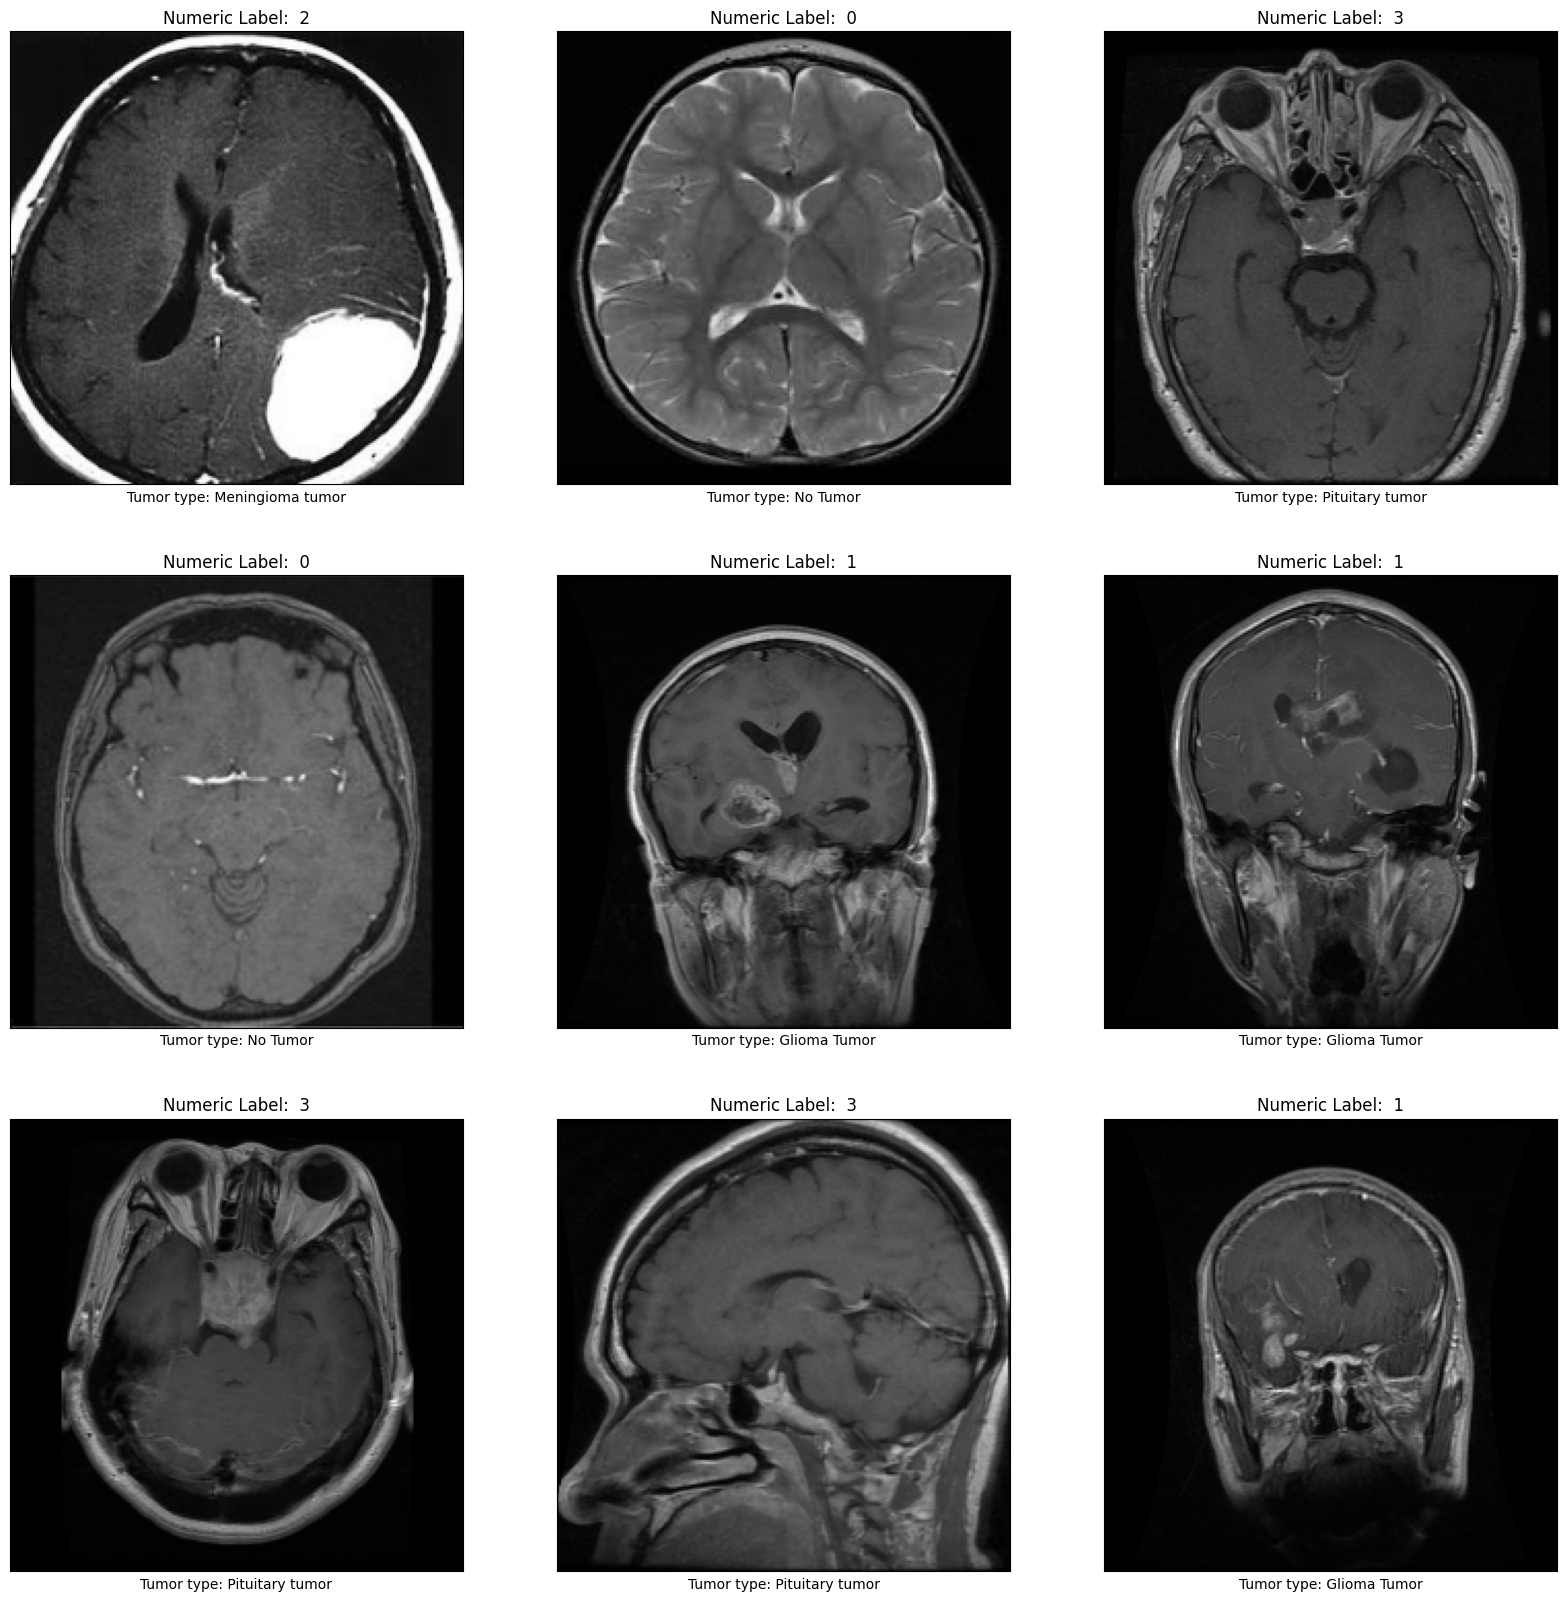

In [9]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_shuffled[i], cmap=plt.cm.binary)
    plt.xlabel(f'Tumor type: {class_names[Y_train_shuffled[i]]}')
    plt.title(f'Numeric Label:  {Y_train_shuffled[i]}')
plt.show()

# <span style='color: darkblue'> Exploring Class Distribution Statistics: Unveiling Insights from Data Balance </span>


In [10]:
counts = Counter()
# Use Counter to count occurrences
counts_train = Counter(Y_train_shuffled)
count_test = Counter(Y_test_shuffled)

numeric_labels_train_unique= list(counts_train.keys() )
labels_train = [class_names[k] for k in numeric_labels_train_unique ]
count_trainn = list(counts_train.values())

numeric_labels_test_unique = list(count_test.keys())
labels_test = [class_names[i] for i in numeric_labels_test_unique ]
count_testt = list(count_test.values())

fig = go.Figure(data=[
    go.Bar(name='Training data images', x=labels_train, y=count_trainn,
            text=count_trainn, textposition='auto', marker=dict(color='green')),
    go.Bar(name='Testing data images', x=labels_test, y=count_testt,
            text=count_testt, textposition='auto', marker=dict(color='red'))
])
fig.update_layout(
    barmode='group',
    legend=dict(
        orientation='h',  # horizontal legend
        yanchor='top',    # anchor to the top of the plot
        y=1.1             # position the legend just above the plot
    )
)
# Change the bar mode
#fig.update_layout(barmode='stack')
#fig.show()
fig.update_traces(texttemplate='%{text}', textposition='inside')

fig.show()

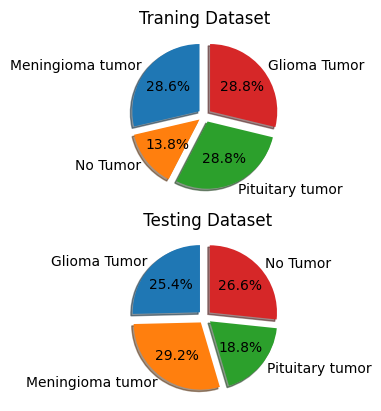

In [11]:
explode = (0.1, 0.1, 0.1, 0.1)  
fig, ax = plt.subplots(2, 1)
ax[0].pie(count_trainn, explode=explode, labels=labels_train, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax[0].set_title('Traning Dataset')

ax[1].pie(count_testt, explode=explode, labels=labels_test, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax[1].set_title('\n Testing Dataset')

plt.show()